# Simulation

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## Learning Objectives

After studying this notebook, completing the activities, engaging in class, and reading the book, you should be able to:
* Estimate probabilities using simulation
* Use a simulation to identify normal distribution
* Affirm error propagation skills using a simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simulation

**Further Reading:** §4.12 in Navidi

Consider two resistors in parallel with resistances $X \sim \mathcal{N}(10~\Omega,~10^2~\Omega^2)$ and $Y \sim \mathcal{N}(25~\Omega,~2.5^2~\Omega^2)$. The total resistance of the circuit is

$$R = \frac{X Y}{X + Y}$$

Assume $X$ and $Y$ are independent.

Notation: $X \sim \mathcal{N}(10~\Omega,~10^2~\Omega^2)$ says that random variable $X$ is normally distributed with mean $10~\Omega$ and variance $10^2~\Omega^2$. Next class we will learn more about the normal distribution. But you can solve this problem using only the mean and variance.

What is $P(19~\Omega \leq R \leq 21~\Omega)$, i.e., the probability the circuit is within specification?

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Pause the video. Spend 3 minutes outlining your solution strategy using probability theory. First, write down the main steps. Then, if you have time, write down the formulas.
</div>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Now watch the video. Does your approach match the class discussion? We will study the normal distribution more next class session.
</div>

### Using Simulation to Estimate a Probability

Intead of all of that calculus, we can use simulation to estimate this probability.

Repeat 1000s of times:
* Generate X and Y using a random number generator
* Compute $R$ and record the value

In [20]:
# specify number of simulations
nsim = 1000

# create vector to store the results
R_sim = np.zeros(nsim)


# create normally distributed noise
# loc = mean
# scale = standard deviation
x = np.random.normal(loc = 100, scale = 10, size=(nsim))
y = np.random.normal(loc = 25, scale=2.5, size=(nsim))
    
# calculate a1, store result
R_sim = x * y / (x + y)

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Estimate $P(19~\Omega \leq X \leq 21~\Omega)$ using your simulation results.
</div>

### Using Simulation to Estimate Means and Variances


In [21]:
# print some descriptive statistis
print("Mean: ",np.mean(R_sim)," Ohms")
print("Median: ",np.median(R_sim)," Ohms")
print("Standard Deviation: ",np.std(R_sim,ddof=1)," Ohms")

Mean:  19.896106291955807  Ohms
Median:  19.945475055638227  Ohms
Standard Deviation:  1.6152635830218904  Ohms


### Using Simulation to Determine Whether a Population is Approximately Normal

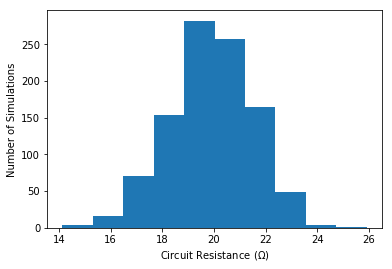

In [22]:
# create histogram of calculated a1 values
plt.hist(R_sim)
plt.xlabel("Circuit Resistance ($\Omega$)")
plt.ylabel("Number of Simulations")
plt.show()

### Practice Problem 4

Reference: §4.12, Problem 18 in Navidi.
    
The length of time to perform an oil change at a certain shop is normally distributed with mean 29.5 minutes and standard deviation 3 minutes. What is the probability that a mechanic can complete 16 oil changes in an eight-hour day?

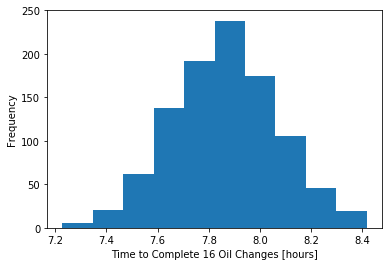

Probability of completing 16 oils changes in eight-hour shift: 0.743


In [23]:
# Let's use simulation! We'll learn how to calculate this answer by hand next class.

### BEGIN SOLUTION

# specify number of simulations
nsim = 1000

# create vector to store the results
sixteen_changes = np.zeros(nsim)

for i in range(nsim):
    # simulate 16 oil changes
    oil_changes = np.random.normal(loc = 29.5, scale = 3, size=16)
    
    # store total time
    sixteen_changes[i] = np.sum(oil_changes)

# convert from minutes to hours
sixteen_changes = sixteen_changes/60
    
plt.hist(sixteen_changes)
plt.xlabel("Time to Complete 16 Oil Changes [hours]")
plt.ylabel("Frequency")
plt.show()

print("Probability of completing 16 oils changes in eight-hour shift:",np.sum(sixteen_changes < 8)/nsim)
### END SOLUTION